This notebook extract and plot the seasonal surface spatial distribution of PM2.5 and its components oer the IGP.

In [1]:
#load modules
%run ../load_main.py
import salem
from WRFChemToolkit.analysis import aerosols_202 as aer, plots as pt, statistics as st, IGP as igp

WRFchem outputs data path is: dpath=/geos/d21/s1878599/IGP


### Load data

In [2]:
#Get IGP data for each season
aut_pth=dpath+'/outputs/autumn/wrfout*.nc'
win_pth=dpath+'/outputs/winter/wrfout*.nc'
mon_pth=dpath+'/outputs/monsoon/wrfout*.nc'
pmon_pth=dpath+'/outputs/premonsoon/wrfout*.nc'

shp_path =  '/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/IGP.shp'
aIGP =igp.get_IGP(aut_pth, shp_path)
wIGP =igp.get_IGP(win_pth, shp_path)
mIGP =igp.get_IGP(mon_pth, shp_path)
pmIGP =igp.get_IGP(pmon_pth, shp_path)

In [3]:
#Get aerosols for each IGP administration (upper, middle lower)

def get_t_aerIGP(dict):
    taer_IGP={}
    for adm, val in dict.items():
        taer_IGP.update({adm : aer.get_aerosols(val)})
    return taer_IGP

In [4]:
#calculate time average values
ataer = get_t_aerIGP(aIGP)
wtaer = get_t_aerIGP(wIGP)
mtaer = get_t_aerIGP(mIGP)
pmtaer = get_t_aerIGP(pmIGP)

### Extract PM and PM components to plot

In [5]:
# shapefiles, latitutes and longitudes for diffrent part of IGP
u_long = ataer['U_IGP'].XLONG.values[0,:,:]
u_lat =  ataer['U_IGP'].XLAT.values[0,:,:]

m_long = ataer['M_IGP'].XLONG.values[0,:,:]
m_lat =  ataer['M_IGP'].XLAT.values[0,:,:]

l_long = ataer['L_IGP'].XLONG.values[0,:,:]
l_lat =  ataer['L_IGP'].XLAT.values[0,:,:]

In [6]:
# get time average values to plot for each IGP zone.
def get_plot_values(ds, var):


    u= ds['U_IGP'][var].mean(dim='Time')[0, :, :]
    m= ds['M_IGP'][var].mean(dim='Time')[0, :, :]
    l= ds['L_IGP'][var].mean(dim='Time')[0, :, :]

    # plot dictionary
    plot_data={}
    plot_data.update({"UPPER IGP": (u_long, u_lat,u)})
    plot_data.update({"MIDDLE IGP":(m_long, m_lat,m)})
    plot_data.update({"LOWER IGP":(l_long, l_lat, l)})
    
    return plot_data

In [7]:
#pm2.5
pmpm25= get_plot_values(pmtaer, "pm25_tot")
mpm25= get_plot_values(mtaer, "pm25_tot")
apm25= get_plot_values(ataer, "pm25_tot")
wpm25= get_plot_values(wtaer, "pm25_tot")

#create dict with mean values (taken from chemical_composition notebook results)
pm25_avg={"pre":{"u":69,"m":89,"l":128},
          "mon":{"u":56,"m":81,"l":100},
          "post":{"u":137,"m":176,"l":185},
          "win":{"u":86,"m":158,"l":191},
         } 

In [8]:
#pm2.5 DRY
t_pmpm25= get_plot_values(pmtaer,"PM2_5_DRY")
t_mpm25= get_plot_values(mtaer,"PM2_5_DRY")
t_apm25= get_plot_values(ataer,"PM2_5_DRY")
t_wpm25= get_plot_values(wtaer,"PM2_5_DRY")

In [9]:
#tot oa
pmoa= get_plot_values(pmtaer, "pm10_OA")
moa= get_plot_values(mtaer, "pm10_OA")
aoa= get_plot_values(ataer, "pm10_OA")
woa= get_plot_values(wtaer, "pm10_OA")

#create dict with mean values
OA_avg={"pre":{"u":11,"m":20,"l":21},
          "mon":{"u":18,"m":21,"l":20},
          "post":{"u":43,"m":53,"l":52},
          "win":{"u":26,"m":35,"l":60},
         } 

In [10]:
#poa
pmpoa= get_plot_values(pmtaer,"pm10_POA")
mpoa= get_plot_values(mtaer, "pm10_POA")
apoa= get_plot_values(ataer, "pm10_POA")
wpoa= get_plot_values(wtaer, "pm10_POA")

#create dict with mean values
POA_avg={"pre":{"u":9,"m":12,"l":13},
          "mon":{"u":6,"m":9,"l":12},
          "post":{"u":23,"m":24,"l":29},
          "win":{"u":18,"m":20,"l":34},
         } 

In [11]:
#soa
pmsoa= get_plot_values(pmtaer, "pm10_SOA")
msoa= get_plot_values(mtaer, "pm10_SOA")
asoa= get_plot_values(ataer, "pm10_SOA")
wsoa= get_plot_values(wtaer, "pm10_SOA")

#create dict with mean values
SOA_avg={"pre":{"u":3,"m":8,"l":8},
          "mon":{"u":11,"m":13,"l":8},
          "post":{"u":20,"m":29,"l":24},
          "win":{"u":8,"m":16,"l":26},
         } 

In [12]:
#dust
pmdustc= get_plot_values(pmtaer, "pm25_dust")
mdustc= get_plot_values(mtaer, "pm25_dust")
adustc= get_plot_values(ataer, "pm25_dust")
wdustc= get_plot_values(wtaer, "pm25_dust")

In [13]:
#sia
pmsia= get_plot_values(pmtaer, "pm25_SIA")
msia= get_plot_values(mtaer, "pm25_SIA")
asia= get_plot_values(ataer, "pm25_SIA")
wsia= get_plot_values(wtaer, "pm25_SIA")

In [14]:
#bc
pmbc= get_plot_values(pmtaer, "pm25_bc")
mbc= get_plot_values(mtaer, "pm25_bc")
abc= get_plot_values(ataer, "pm25_bc")
wbc= get_plot_values(wtaer, "pm25_bc")

In [15]:
#sea salt
pmsea= get_plot_values(pmtaer, "pm25_sea")
msea= get_plot_values(mtaer, "pm25_sea")
asea= get_plot_values(ataer, "pm25_sea")
wsea= get_plot_values(wtaer, "pm25_sea")

### Plot surface distribution

In [16]:
# DEFINE PLOT FUNCTION

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.colorbar import colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader


def set_formatter(axes,leftlab):
    for ax in axes:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_right = False
        gl.ylabels_left = False
        gl.ylocator = mticker.FixedLocator([20,25,30,35])
        gl.xlocator = mticker.FixedLocator([68,72,75,78,81,84,87,90])
        
    # get lat values only n the bottom ax
        if (ax==axes[9]) or (ax==axes[10]) or (ax==axes[11]):
            gl.xlabels_bottom = True
   # get lon values only n the left ax
        if leftlab==True:
            if ax==axes[0] or ax==axes[3] or ax==axes[6] or ax==axes[9]:
                gl.ylabels_left = True
    
    
def set_admin(axes, shp_path):
    for ax,shp in zip(axes,shp_path):
            admin = list(shpreader.Reader(shp).geometries())
            # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
            ax.add_geometries(admin, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=1, lw=0.5)


from matplotlib.offsetbox import AnchoredText
def add_tbox(ax,loc,text):
    at = AnchoredText(text,
                  prop=dict(size=12), frameon=True,
                  loc=loc)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
            

def subIGP(pmds,mds,ads,wds,d=None, vmax=100, title=None,axs=False,bar=False,leftlab=False,subigp=False,save=False, 
           cmap="OrRd",savetit='plot', levs=10,delta=None, figsize=[8, 8]): #figsize=[8, 8]

    fig, axes =plt.subplots(nrows=4,ncols=3,figsize=figsize, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # plot admin regions
    u_shp="/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/U_IGP.shp"
    m_shp="/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/M_IGP.shp"
    l_shp= "/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/L_IGP.shp"
    shp_path=(u_shp,m_shp,l_shp,u_shp,m_shp,l_shp,u_shp,m_shp,l_shp,u_shp,m_shp,l_shp)
    set_formatter(fig.axes,leftlab)
    set_admin(axes.flatten(), shp_path)
    
    #Getting values.
    vpm=list(pmds.values())
    vm=list(mds.values())
    va=list(ads.values())
    vw=list(wds.values())
    
    if vmax is not None:  # set vmax in the bar to a fixed costumed value (useful to compare consitently different plots).
        vmax=vmax  
    else: 
        import math  # Get the max value in the array to plot.
        vmax =np.array([np.nanmax(vpm[0][2]),np.nanmax(vpm[1][2]),np.nanmax(vpm[2][2]),
                        np.nanmax(vm[0][2]),np.nanmax(vm[1][2]),np.nanmax(vm[2][2]),
                        np.nanmax(va[0][2]),np.nanmax(va[1][2]),np.nanmax(va[2][2]),
                        np.nanmax(vw[0][2]),np.nanmax(vw[1][2]),np.nanmax(vw[2][2])]).max()       
       
    vmin=0
    levels = np.linspace(vmin, vmax, levs)  # number of levels for which divide the bar. Customised. 
    
    for ax in fig.axes:
         ax.set_anchor("S",share=True)
    
    
    # premonsoon
    cspm_u=axes[0,0].contourf(vpm[0][0], vpm[0][1],vpm[0][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels,vmin=vmin,vmax=vmax,extend="max") #U IGP values.
    cspm_m=axes[0,1].contourf(vpm[1][0], vpm[1][1],vpm[1][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max") #M IGP values.
    cspm_l=axes[0,2].contourf(vpm[2][0], vpm[2][1],vpm[2][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max")
    cspm_u.cmap.set_over("#FFFF00")
    cspm_m.cmap.set_over("#FFFF00")
    cspm_l.cmap.set_over("#FFFF00")
   
                                                  
    # monsoon
    csm_u=axes[1,0].contourf(vm[0][0], vm[0][1],vm[0][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels,vmin=vmin,vmax=vmax,extend="max")  #U IGP values.
    csm_m=axes[1,1].contourf(vm[1][0], vm[1][1],vm[1][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max")  #M IGP values.
    csm_l=axes[1,2].contourf(vm[2][0], vm[2][1],vm[2][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max") 
    csm_u.cmap.set_over("#FFFF00")
    csm_m.cmap.set_over("#FFFF00")
    csm_l.cmap.set_over("#FFFF00")
    
    #autumn
    csa_u=axes[2,0].contourf(va[0][0], va[0][1],va[0][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels,vmin=vmin,vmax=vmax,extend="max")  #U IGP values.
    csa_m=axes[2,1].contourf(va[1][0], va[1][1],va[1][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max")  #M IGP values.
    csa_l=axes[2,2].contourf(va[2][0], va[2][1],va[2][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max") 
    csa_u.cmap.set_over("#FFFF00")
    csa_m.cmap.set_over("#FFFF00")
    csa_l.cmap.set_over("#FFFF00")
    
    #winter
    csw_u=axes[3,0].contourf(vw[0][0], vw[0][1],vw[0][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max") #U IGP values.
    csw_m=axes[3,1].contourf(vw[1][0], vw[1][1],vw[1][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max")#M IGP values.
    csw_l=axes[3,2].contourf(vw[2][0], vw[2][1],vw[2][2],transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, vmin=vmin,vmax=vmax,extend="max")
    csw_u.cmap.set_over("#FFFF00")
    csw_m.cmap.set_over("#FFFF00")
    csw_l.cmap.set_over("#FFFF00")
    
    #add mean  boxes
    if d is not None:
        add_tbox(axes[0,0],"lower right",d["pre"]["u"])
        add_tbox(axes[0,1],"lower left",d["pre"]["m"])
        add_tbox(axes[0,2],"lower left",d["pre"]["l"])
    
        add_tbox(axes[1,0],"lower right",d["mon"]["u"])
        add_tbox(axes[1,1],"lower left",d["mon"]["m"])
        add_tbox(axes[1,2],"lower left",d["mon"]["l"])
    
        add_tbox(axes[2,0],"lower right",d["post"]["u"])
        add_tbox(axes[2,1],"lower left",d["post"]["m"])
        add_tbox(axes[2,2],"lower left",d["post"]["l"])
    
        add_tbox(axes[3,0],"lower right",d["win"]["u"])
        add_tbox(axes[3,1],"lower left",d["win"]["m"])
        add_tbox(axes[3,2],"lower left",d["win"]["l"])
    
    #add panel boxes
    panels=["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]
    for ax,p in zip(fig.axes,panels):
        ax.annotate(p, xy=(1, 1), xytext=(-5, -5), fontsize=13,
        xycoords='axes fraction', textcoords='offset points',
        bbox=dict(facecolor='white',edgecolor='white', alpha=0.8),
        horizontalalignment='right', verticalalignment='top')
    
    # IGP area
    if subigp==True:
        axes[0,0].text(0.5, 1.15, 'UPPER', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize=12,
        transform=axes[0,0].transAxes)
        axes[0,1].text(0.5, 1.35, 'MIDDLE', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize=12,
        transform=axes[0,1].transAxes)
        axes[0,2].text(0.5, 1.25, 'LOWER', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize=12,
        transform=axes[0,2].transAxes)
    
    if axs==True:
    # season
        axes[0,0].text(-0.3, 0.55, 'PRE-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=13,
        transform=axes[0,0].transAxes)
        axes[1,0].text(-0.3, 0.55, 'MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=13,
        transform=axes[1,0].transAxes)
        axes[2,0].text(-0.3, 0.55, 'POST-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=13,
        transform=axes[2,0].transAxes)
        axes[3,0].text(-0.3, 0.55, 'WINTER', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=13,
        transform=axes[3,0].transAxes)
    
    if bar==True:
    
        cbar_ax = fig.add_axes([1, 0.15, 0.04, 0.7]) 
        cbar=fig.colorbar(csm_l,cax=cbar_ax,shrink=0.6, format="%.f")
        cbar.set_label("$\mu g~m^{-3}$",fontsize=12)
    
        if delta is None:
            delta=int(vmax/10)
        cbar.set_ticks(list(range(vmin, vmax+delta, delta)))
        cbar.set_ticklabels(list(range(vmin, vmax, delta))+[vmax])
        cbar.ax.tick_params(labelsize='large')

    if title is not None:
        axes[0,0].set_title(title, fontsize=12,pad=20)
    
    fig.subplots_adjust(right=0.5)
    fig.tight_layout()
    
    if save:
        plt.savefig('./'+savetit+'.png', format='png', dpi=300, bbox_inches = "tight")
    
    fig.show() 

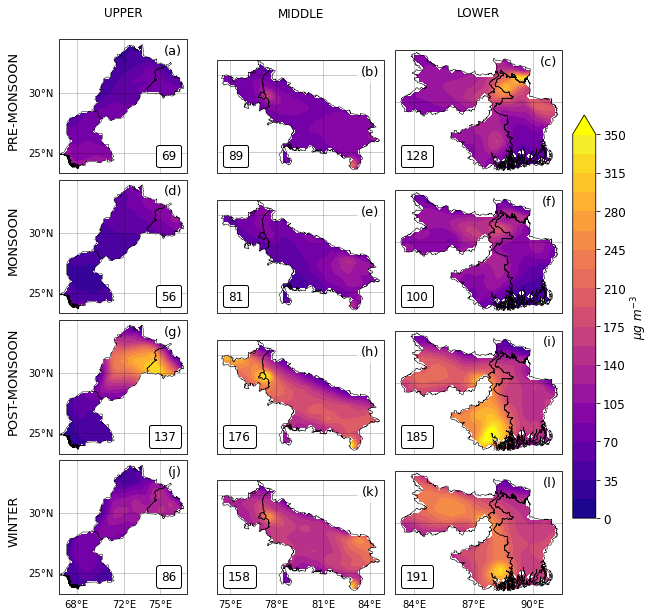

In [18]:
subIGP(pmpm25,mpm25,apm25,wpm25,pm25_avg,cmap="plasma",save=True,subigp=True, leftlab=True,bar=True,axs=True,vmax=350, levs=21,savetit='pm25_distr')

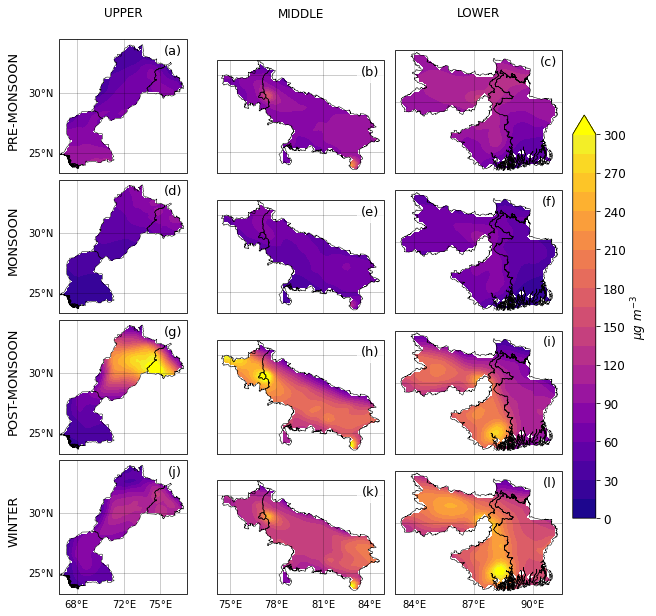

In [19]:
subIGP(t_pmpm25,t_mpm25,t_apm25,t_wpm25,leftlab=True,bar=True,subigp=True,axs=True,cmap="plasma",vmax=300, levs=21)

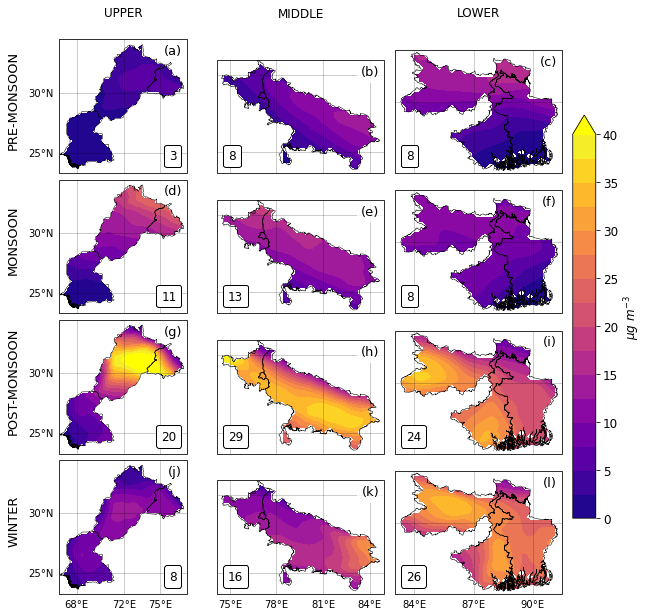

In [20]:
subIGP(pmsoa,msoa,asoa,wsoa,SOA_avg, cmap="plasma",savetit='soa_distr',delta=5,save=False,leftlab=True,subigp=True,bar=True,axs=True,vmax=40, levs=17)

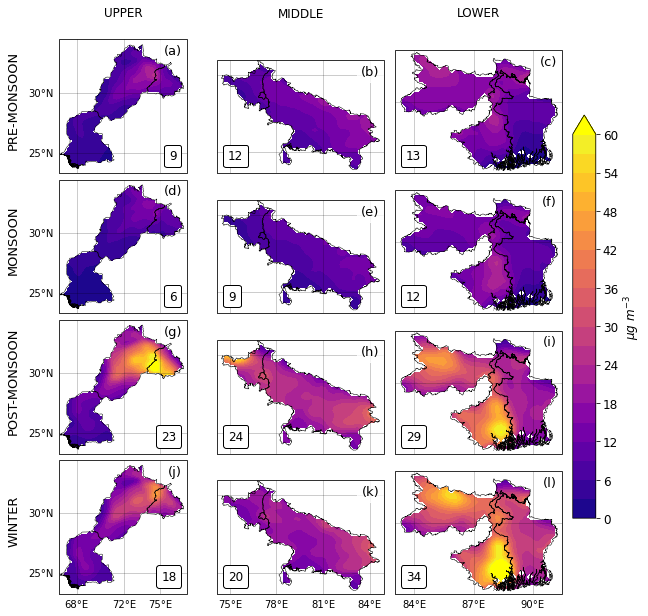

In [21]:
subIGP(pmpoa,mpoa,apoa,wpoa,POA_avg, cmap="plasma",savetit='poa_distr',save=False,leftlab=True,subigp=True,bar=True,axs=True,vmax=60, levs=21)

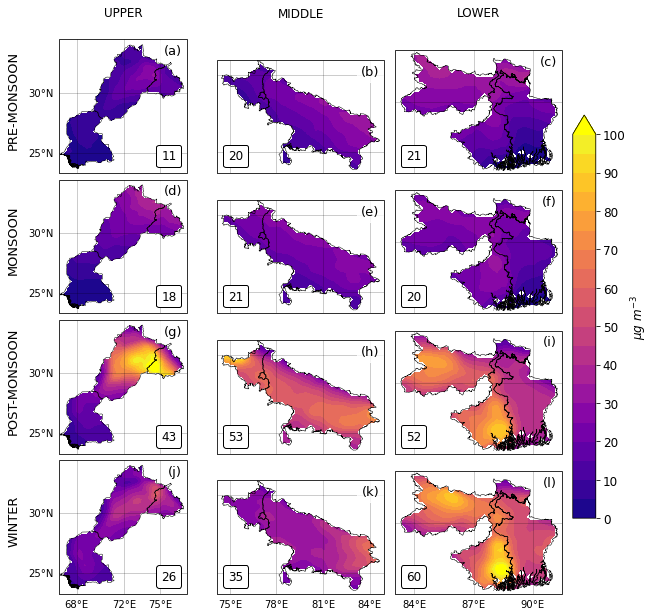

In [22]:
subIGP(pmoa,moa,aoa,woa,OA_avg,cmap="plasma",savetit='oa_distr',save=False,leftlab=True,subigp=True,bar=True,axs=True,vmax=100, levs=21)

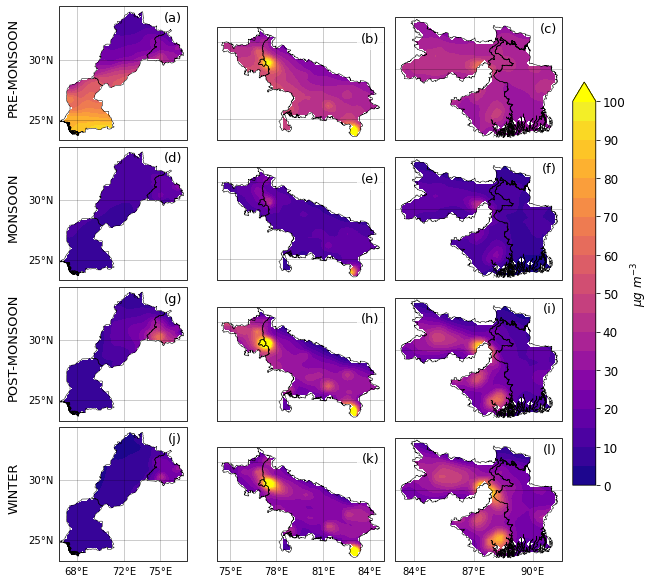

In [23]:
subIGP(pmdustc, mdustc,adustc,wdustc,leftlab=True,bar=True,axs=True,cmap="plasma",vmax=100, levs=21)

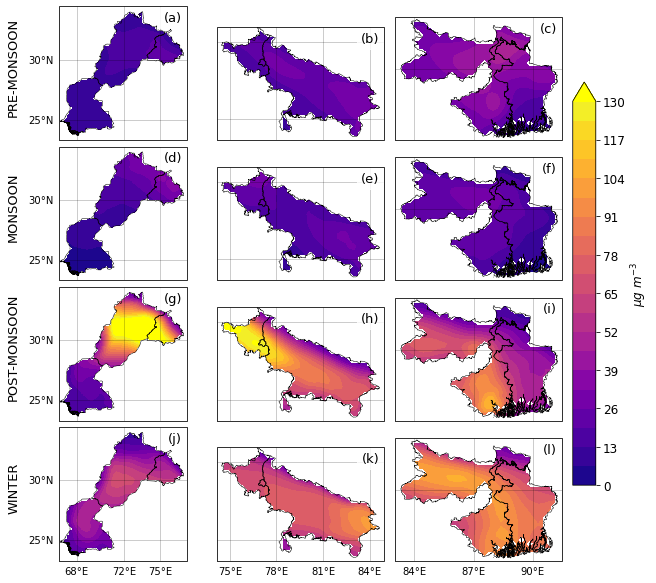

In [24]:
subIGP(pmsia,msia,asia,wsia,leftlab=True,bar=True,axs=True,cmap="plasma",vmax=130, levs=21)

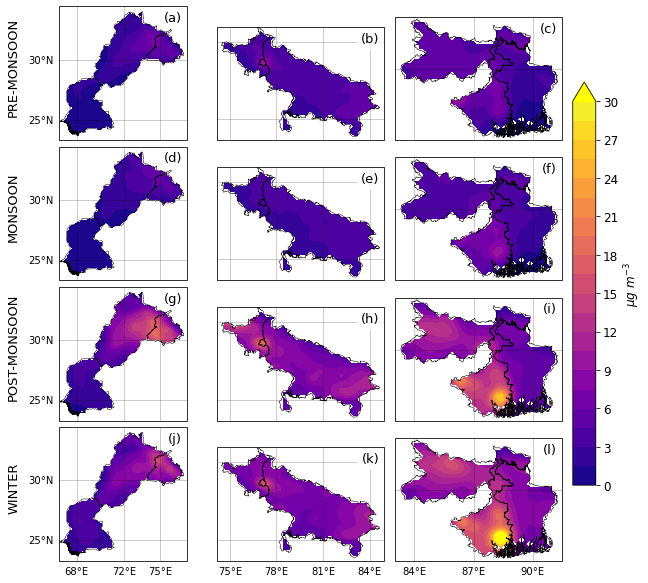

In [25]:
subIGP(pmbc,mbc,abc,wbc,leftlab=True,bar=True,axs=True,cmap="plasma",vmax=30, levs=21)

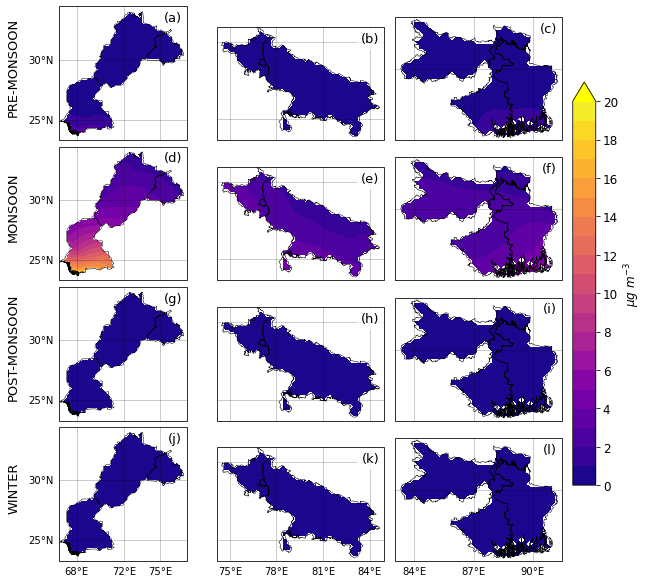

In [26]:
subIGP(pmsea,msea,asea,wsea,leftlab=True,bar=True,axs=True,cmap="plasma",vmax=20, levs=21)